<a href="https://colab.research.google.com/github/utyabia/1-notebook/blob/main/Post_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. SETUP & DATA LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [3]:
try:
    df = pd.read_csv('/content/SuperMarket Analysis.csv')
    print("Dataset loaded successfully!")
except:
    print("Please upload the Kaggle CSV file to Colab.")

Dataset loaded successfully!


In [6]:
# 2. DATA CLEANING & FEATURE ENGINEERING
# Convert Date and Time to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

In [7]:
# Create new features
df['DayOfWeek'] = df['Date'].dt.day_name()
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [8]:
# Drop columns that don't help in general prediction (IDs)
df_model = df.drop(['Invoice ID', 'Date', 'gross margin percentage'], axis=1)

In [9]:
# Encode categorical variables
le = LabelEncoder()
cat_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'DayOfWeek']
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

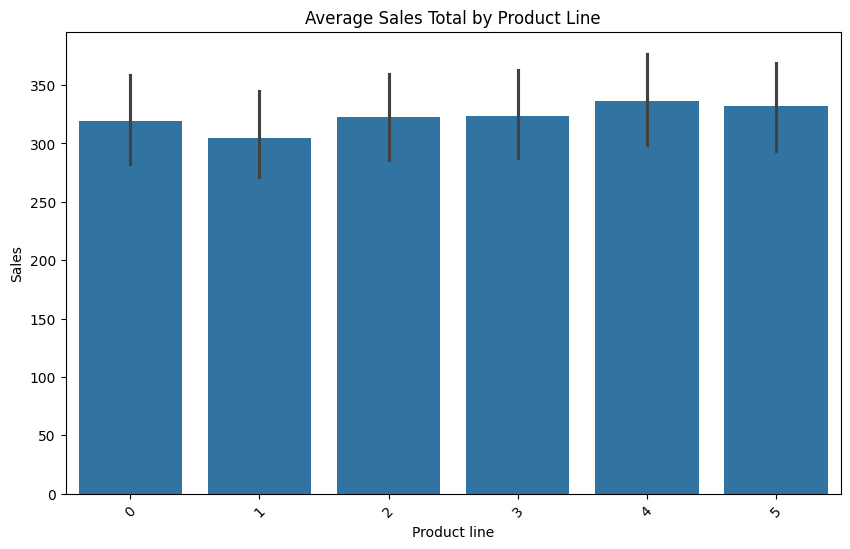

In [13]:
# 3. EXPLORATORY DATA ANALYSIS (Highlights)
plt.figure(figsize=(10,6))
sns.barplot(x='Product line', y='Sales', data=df_model)
plt.xticks(rotation=45)
plt.title('Average Sales Total by Product Line')
plt.show()

In [15]:
# 4. DATA SPLITTING
X = df_model.drop('Sales', axis=1)
y = df_model['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 5. MODELING
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})



--- Model Performance Comparison ---
               Model           MAE          RMSE        R2
0  Linear Regression  1.141487e-13  1.279534e-13  1.000000
1      Random Forest  7.567245e-01  1.292626e+00  0.999974
2            XGBoost  2.602845e+00  4.511078e+00  0.999687


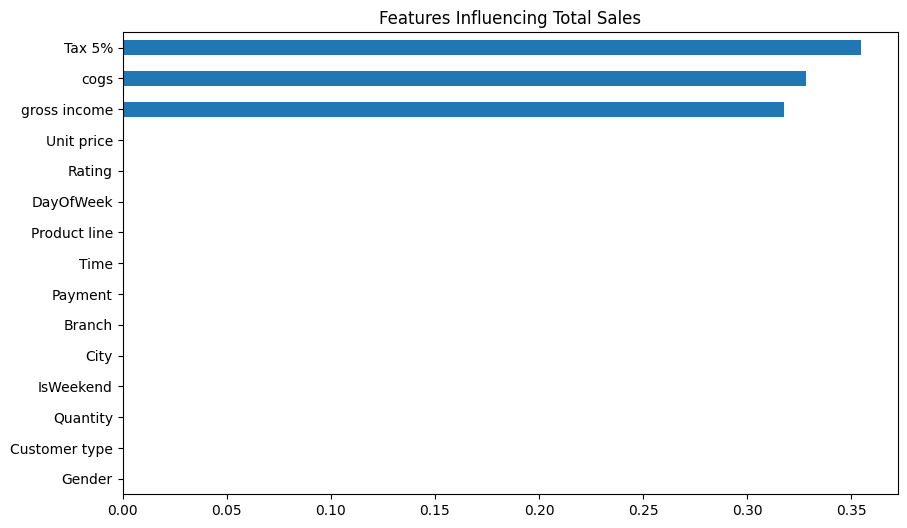

In [17]:
# 6. EVALUATION
results_df = pd.DataFrame(results)
print("\n--- Model Performance Comparison ---")
print(results_df)

# Feature Importance (using Random Forest)
rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh')
plt.title('Features Influencing Total Sales')
plt.show()